### Airline Ticket Price Prediction
### Objective: Predict flight ticket prices based on airline, time, season, and other features.
### Techniques: Regression (Random Forest, Gradient Boosting), Feature Engineering
### Dataset: Kaggle Flight Price Dataset

In [273]:
import pandas as pd
from skimpy import skim

In [275]:
A=pd.read_csv(r"C:\Users\Maharshi Goswami\OneDrive\Documents\ML\project\flight_price.csv")


In [276]:
A.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [278]:
A["Additional_Info"]

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10683, dtype: object

In [280]:
A.drop(columns=["Additional_Info"],axis=1,inplace=True)

In [282]:
A.isnull().sum()/len(A)*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Price              0.000000
dtype: float64

In [283]:
A.dropna(inplace=True)

In [285]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Price            10682 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 918.0+ KB


In [287]:
A["Journey_month"] = pd.to_datetime(A["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [289]:
A["Date_of_Journey"]=A["Date_of_Journey"].astype("datetime64[ns]")

In [290]:
A["Journey_year"]=A["Date_of_Journey"].dt.year
A["journey_week"]=A["Date_of_Journey"].dt.dayofweek

In [293]:
A.drop("Date_of_Journey",axis=1,inplace=True)

In [294]:
A["Dep_Time"]=A["Dep_Time"].astype('datetime64[ns]')

In [298]:
A["Dep_min"]=A["Dep_Time"].dt.minute

In [299]:
A["Dep_hour"]=A["Dep_Time"].dt.hour

In [300]:
A.drop('Dep_Time', axis=1, inplace=True)

In [301]:
A["Arrival_Time"]=A["Arrival_Time"].astype("datetime64[ns]")

In [302]:
A["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [303]:
A["Total_Stops"]=A["Total_Stops"].map({
   'non-stop':0,
    '2 stops':2,
    '1 stop':1,
    '3 stops':3,
    '4 stops':4})

In [304]:
A["Arrival_min"]=A["Arrival_Time"].dt.minute
A["Arrival_hour"]=A["Arrival_Time"].dt.hour

In [305]:
A.drop("Arrival_Time",axis=1,inplace=True)

In [306]:
# Fill missing minutes or hours
A['Duration'] = A['Duration'].apply(lambda x: x if 'h' in x and 'm' in x else
                                      (x + ' 0m') if 'h' in x else
                                      ('0h ' + x))

# Split into hours and minutes
A['Duration_Hour'] = A['Duration'].apply(lambda x: int(x.split('h')[0]))
A['Duration_Minute'] = A['Duration'].apply(lambda x: int(x.split('h')[1].strip().replace('m','')))

# Drop original duration column if needed
A.drop('Duration', axis=1, inplace=True)


In [307]:
#Check which columns are still categorical
A.select_dtypes(include="object").columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

### Encoding

In [309]:
A=pd.get_dummies(A,columns=["Airline","Source","Destination"],drop_first=True)

In [311]:
A.drop("Route",axis=1,inplace=True)

In [324]:
bool_col=A.select_dtypes(include="bool").columns
A[bool_col]=A[bool_col].astype(int)

In [326]:
A.head(4)

,Total_Stops,Price,Journey_month,Journey_year,journey_week,Dep_min,Dep_hour,Arrival_min,Arrival_hour,Duration_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,2019,6,20,22,10,1,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,2019,5,50,5,15,13,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,2019,4,25,9,25,4,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,2019,3,5,18,30,23,5,...,0,0,0,1,0,0,0,0,0,0


In [328]:
A.columns

Index(['Total_Stops', 'Price', 'Journey_month', 'Journey_year', 'journey_week',
       'Dep_min', 'Dep_hour', 'Arrival_min', 'Arrival_hour', 'Duration_Hour',
       'Duration_Minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [330]:
x=A.drop("Price",axis=1)
y=A["Price"]

### Tain_Test_Split

In [333]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Random Forest for Flight Prediction

In [336]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

### Evaluate Model Performance

In [338]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


MAE: 1467.879207264795
MSE: 7736552.465407634
RMSE: 2781.4658842789413
R² Score: 0.6411959810744818


###  Gradient Boosting for Flight Price Prediction

In [342]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(x_train,y_train)
y_pred_gb=gb.predict(x_test)

### Evaluate model Performance

In [344]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE:",mean_absolute_error(y_test, y_pred_gb))
print("MSE:",mean_squared_error(y_test, y_pred_gb))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R2 Score:",r2_score(y_test, y_pred_gb))

MAE: 1611.2716060283628
MSE: 6283680.681674443
RMSE: 2506.727085598758
R2 Score: 0.7085769285078278


### Creating actual & predicted column in table using random forest 

In [183]:
# Convert X_test back to a DataFrame (if not already)
x_test_A = pd.DataFrame(x_test, columns=x.columns)

# Reset index so everything aligns properly
x_test_A = x_test_A.reset_index(drop=True)

# Also reset y_test to align
y_test = y_test.reset_index(drop=True)

# Add actual and predicted prices
x_test_A['Actual_Price'] = y_test
x_test_A['Predicted_Price'] = y_pred_rf


In [104]:
print(x_test_A.head())

   Total_Stops  Journey_month  Journey_year  journey_week  Dep_min  Dep_hour  \
0            2              5          2019             1        5        15   
1            1              6          2019             2       35        10   
2            1              5          2019             3       20        20   
3            0              5          2019             4       45        14   
4            1              5          2019             1       50        22   

   Arrival_min  Arrival_hour  Duration_Hour  Duration_Minute  ...  \
0           30             1             10               25  ...   
1           35            19              9                0  ...   
2            5             9             12               45  ...   
3            5            17              2               20  ...   
4           25             4              5               35  ...   

   Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Cochin  \
0             1               0   

In [361]:
from tabulate import tabulate

table1 = tabulate(x_test_A[['Dep_hour', 'Journey_month', 'Total_Stops', 'Duration_Hour',
                            'Duration_Minute', 'Actual_Price', 'Predicted_Price']].head(10),
                 headers='keys', tablefmt='pretty')

print(table1)


+---+----------+---------------+-------------+---------------+-----------------+--------------+--------------------+
|   | Dep_hour | Journey_month | Total_Stops | Duration_Hour | Duration_Minute | Actual_Price |  Predicted_Price   |
+---+----------+---------------+-------------+---------------+-----------------+--------------+--------------------+
| 0 |   15.0   |      5.0      |     2.0     |     10.0      |      25.0       |   16655.0    |      17062.88      |
| 1 |   10.0   |      6.0      |     1.0     |      9.0      |       0.0       |    4959.0    | 5375.253333333334  |
| 2 |   20.0   |      5.0      |     1.0     |     12.0      |      45.0       |    9187.0    |      9108.12       |
| 3 |   14.0   |      5.0      |     0.0     |      2.0      |      20.0       |    3858.0    |      3759.33       |
| 4 |   22.0   |      5.0      |     1.0     |      5.0      |      35.0       |   12898.0    | 14800.118333333336 |
| 5 |   7.0    |      5.0      |     1.0     |     11.0      |  

In [347]:
x_test_B=pd.DataFrame(x_test,columns=x.columns)
x_test_B=x_test_B.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

x_test_B["Actual Price"]=y_test
x_test_B["Predicted Price"]=y_pred_gb

In [365]:
print(x_test_B.head())

   Total_Stops  Journey_month  Journey_year  journey_week  Dep_min  Dep_hour  \
0            2              5          2019             1        5        15   
1            1              6          2019             2       35        10   
2            1              5          2019             3       20        20   
3            0              5          2019             4       45        14   
4            1              5          2019             1       50        22   

   Arrival_min  Arrival_hour  Duration_Hour  Duration_Minute  ...  \
0           30             1             10               25  ...   
1           35            19              9                0  ...   
2            5             9             12               45  ...   
3            5            17              2               20  ...   
4           25             4              5               35  ...   

   Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Cochin  \
0             1               0   

In [363]:
from tabulate import tabulate
table2 =tabulate(x_test_B[['Dep_hour', 'Journey_month', 'Total_Stops', 'Duration_Hour',
                            'Duration_Minute', 'Actual Price', 'Predicted Price']].head(10),
               headers="keys",tablefmt="pretty")
print(table2)

+---+----------+---------------+-------------+---------------+-----------------+--------------+--------------------+
|   | Dep_hour | Journey_month | Total_Stops | Duration_Hour | Duration_Minute | Actual Price |  Predicted Price   |
+---+----------+---------------+-------------+---------------+-----------------+--------------+--------------------+
| 0 |   15.0   |      5.0      |     2.0     |     10.0      |      25.0       |   16655.0    | 16492.303198153248 |
| 1 |   10.0   |      6.0      |     1.0     |      9.0      |       0.0       |    4959.0    | 6738.226028523922  |
| 2 |   20.0   |      5.0      |     1.0     |     12.0      |      45.0       |    9187.0    | 8941.544017229553  |
| 3 |   14.0   |      5.0      |     0.0     |      2.0      |      20.0       |    3858.0    | 4439.599294328674  |
| 4 |   22.0   |      5.0      |     1.0     |      5.0      |      35.0       |   12898.0    | 12166.780069340555 |
| 5 |   7.0    |      5.0      |     1.0     |     11.0      |  

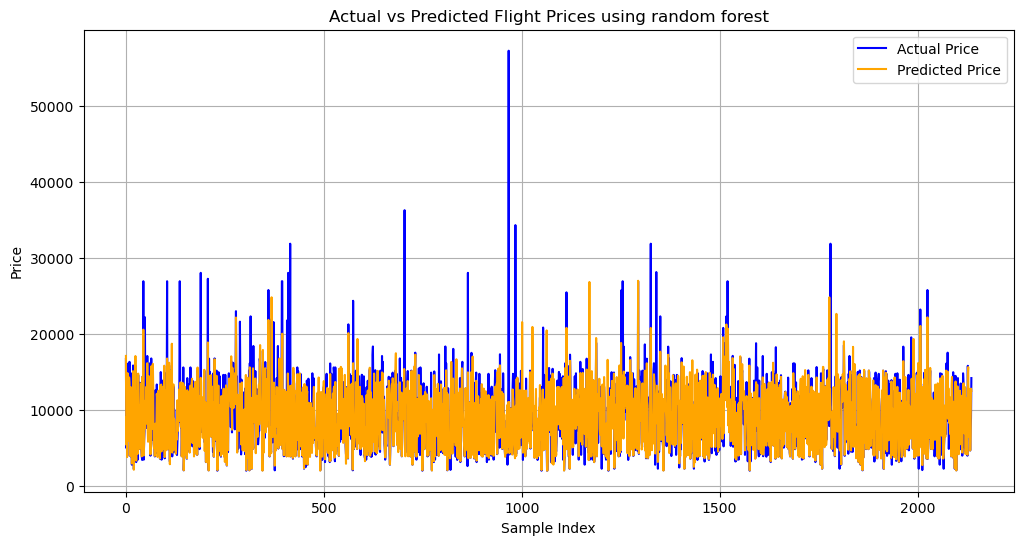

In [379]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(x_test_A['Actual_Price'].values, label='Actual Price', color='blue')
plt.plot(x_test_A['Predicted_Price'].values, label='Predicted Price', color='orange')
plt.title('Actual vs Predicted Flight Prices using random forest')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


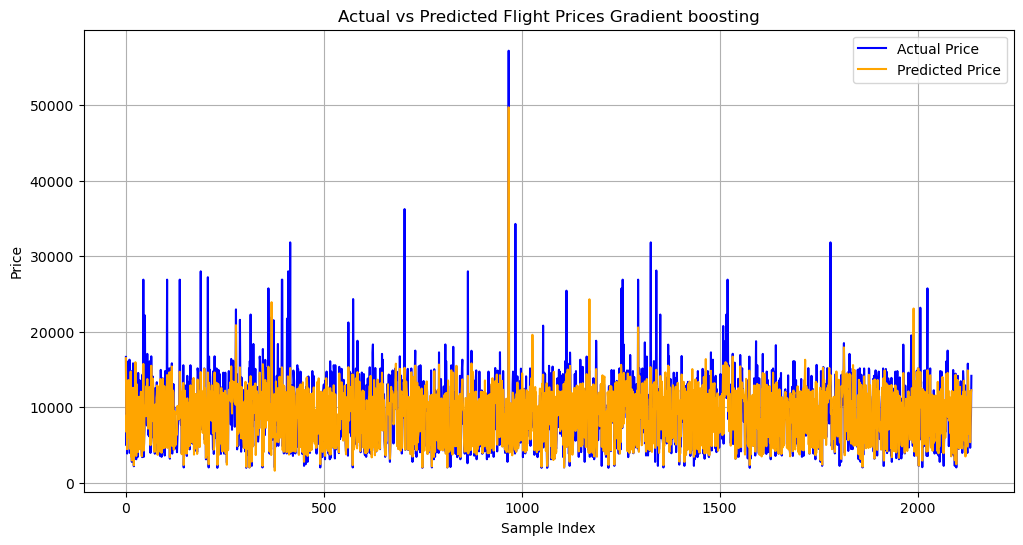

In [383]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(x_test_B['Actual Price'].values, label='Actual Price', color='blue')
plt.plot(x_test_B['Predicted Price'].values, label='Predicted Price', color='orange')
plt.title('Actual vs Predicted Flight Prices Gradient boosting')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
